In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.sample(5)

,Unnamed: 0,label,text,label_num
24,4827,spam,Subject: jump in to gain substantial ground im...,1
2193,889,ham,"Subject: hpl noms for june 06 , 2000\n( see at...",0
2437,2011,ham,Subject: calpine daily gas nomination\n>\nrick...,0
4360,3912,spam,"Subject: interesting stuff\nhey ,\ni just hear...",1
3424,4474,spam,Subject: canvas\n2005 cable t v de 5 rambler w...,1


In [5]:
#drop some cols
df.drop(columns=["Unnamed: 0",'label'], inplace=True)

In [6]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

178

In [8]:
df.shape

(5171, 2)

EDA(Exploratory Data Analysis)

In [9]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [10]:
df['label_num'].value_counts()

label_num
0    3672
1    1499
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2305ab36d50>,
 [Text(-0.6745093333607546, 0.8689287423081543, 'ham'),
  Text(0.6745094147157317, -0.868928679156029, 'spam')],
 [Text(-0.3679141818331388, 0.4739611321680841, '71.01'),
  Text(0.3679142262085809, -0.4739610977214703, '28.99')])

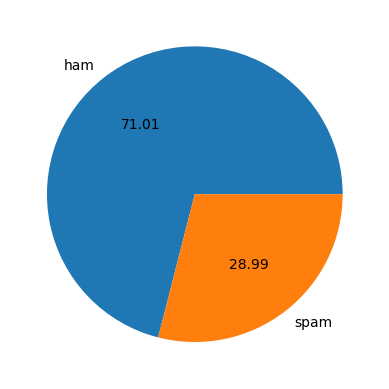

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

data is imbalanced

In [12]:
import nltk

In [13]:
nltk.download('punkt') #unsupervised training model which can be ttrained on data that hasnt been tageed with information identifying its characteristics,properties or categories(unlabeled data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_characters']=df['text'].apply(len) #getting number of characters in every email message and creating a column call num characters 

In [15]:
df.head()

,text,label_num,num_characters
0,Subject: enron methanol ; meter # : 988291\nth...,0,322
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515
3,"Subject: photoshop , windows , office . cheap ...",1,404
4,Subject: re : indian springs\nthis deal is to ...,0,332


In [16]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df.head()

,text,label_num,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551
3,"Subject: photoshop , windows , office . cheap ...",1,404,49
4,Subject: re : indian springs\nthis deal is to ...,0,332,71


Number of Sentences

In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.00000,5171.000000,5171.000000
mean,1029.74531,229.181009,13.121253
std,1505.10317,336.487397,27.541637
min,10.00000,2.000000,1.000000
25%,238.00000,52.000000,4.000000
50%,529.00000,122.000000,7.000000
75%,1214.00000,283.500000,15.000000
max,31860.00000,8863.000000,1204.000000


In [21]:
df[df['label_num'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,959.392974,226.239107,11.440904
std,1360.494244,332.179661,24.892442
min,17.000000,3.000000,1.000000
25%,227.000000,51.000000,3.000000
50%,517.500000,124.000000,6.000000
75%,1208.000000,294.000000,13.000000
max,31860.000000,8863.000000,1204.000000


In [22]:
df[df['label_num'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1202.082722,236.387592,17.237492
std,1800.139488,346.821249,32.796043
min,10.000000,2.000000,1.000000
25%,274.000000,55.000000,4.000000
50%,563.000000,116.000000,9.000000
75%,1236.500000,244.000000,18.500000
max,21749.000000,3963.000000,693.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

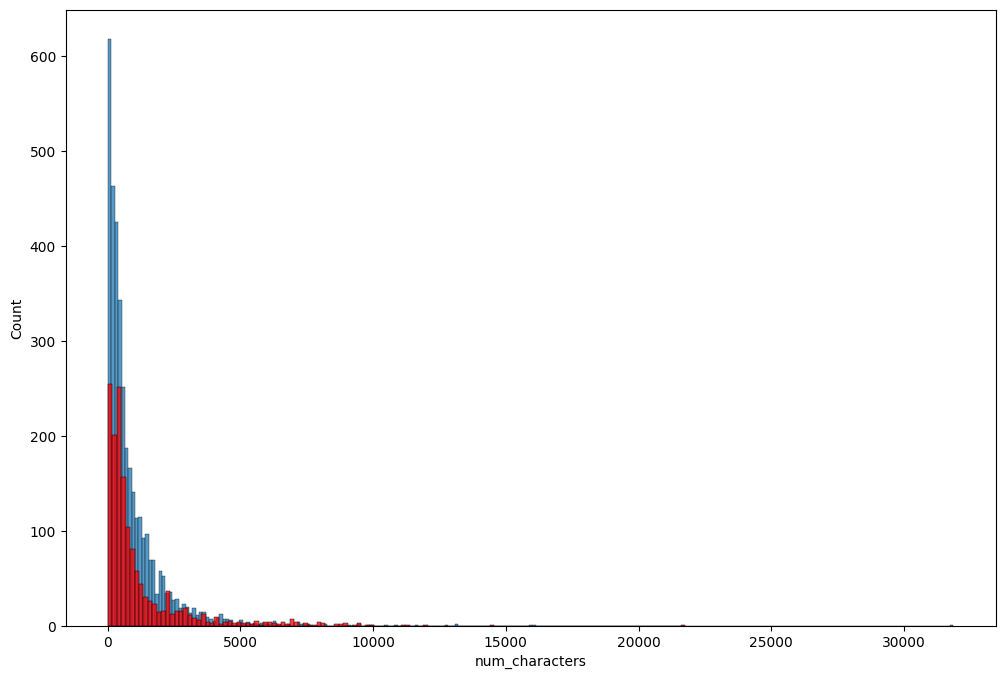

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label_num'] == 0]['num_characters'])
sns.histplot(df[df['label_num'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

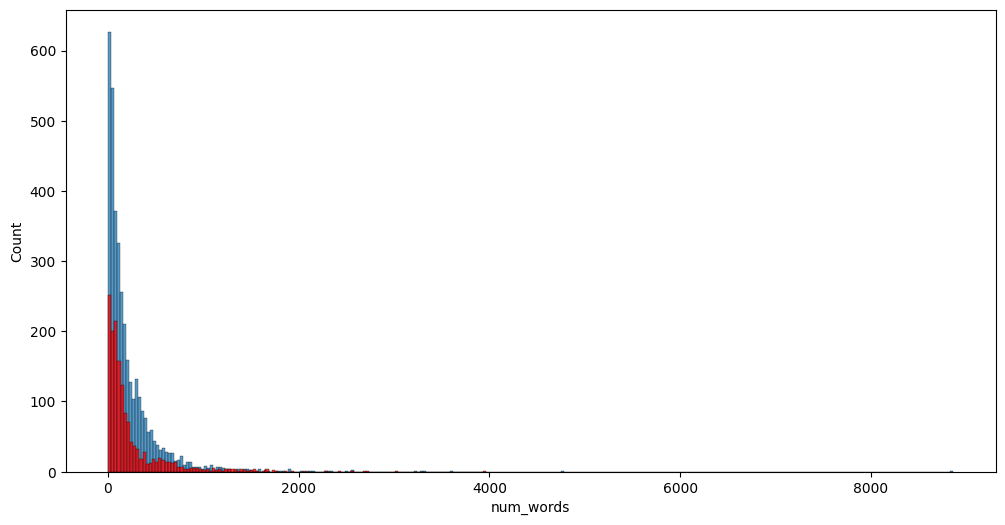

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num'] == 0]['num_words'])
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red')

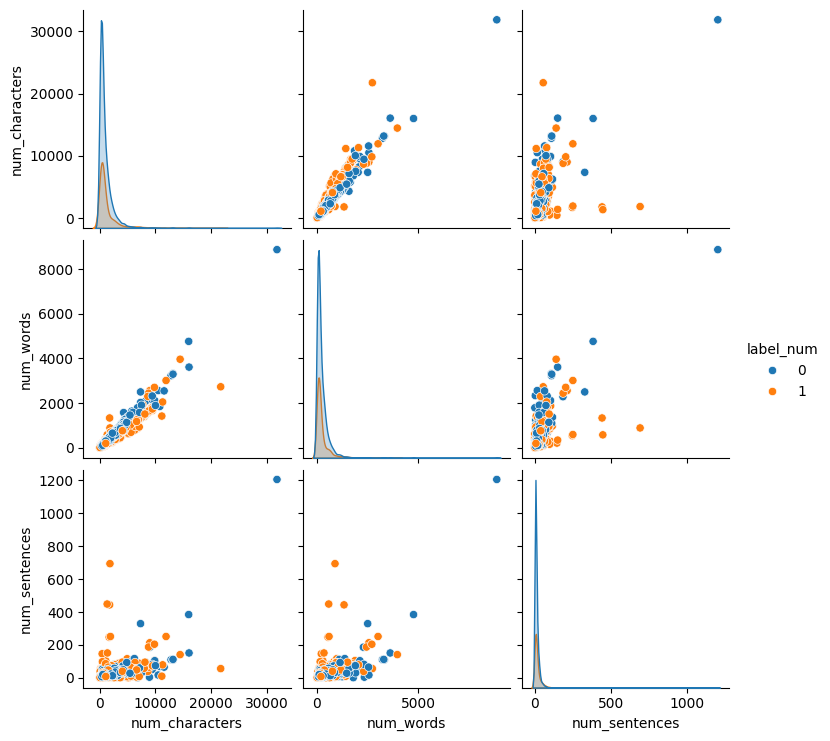

In [26]:
sns.pairplot(df,hue='label_num')

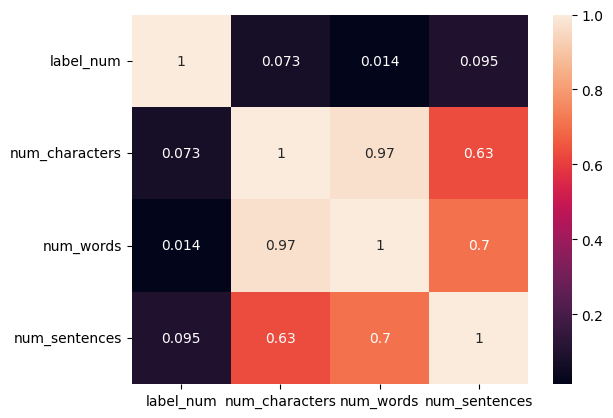

In [27]:
import numpy as np
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_df.corr()
#Plotting the sns(seaborne) heatmap
sns.heatmap(corr_matrix,annot=True)
plt.show()


Data Preprocessing
1. LowerCase
2.Tokenization
3. Removing Special characters
4.Removing stopwords and punctuations
5.Stemming

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fenuk\AppData\Roaming\nltk_data...


True

In [30]:
from nltk.stem import PorterStemmer

# Create an instance of PorterStemmer
#porter = PorterStemmer()


In [32]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
import string 



In [33]:
#created a method to transform the email text
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text =y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(lemmatizer.lemmatize(i))
            
    return " ".join(y)

In [34]:
transform_text("Go until jurong point,crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat....")

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3,subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3,subject photoshop window office cheap main tre...
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3,subject indian spring deal book teco pvr reven...


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['label_num'] == 1]['transformed_text'].str.cat(sep=" "))

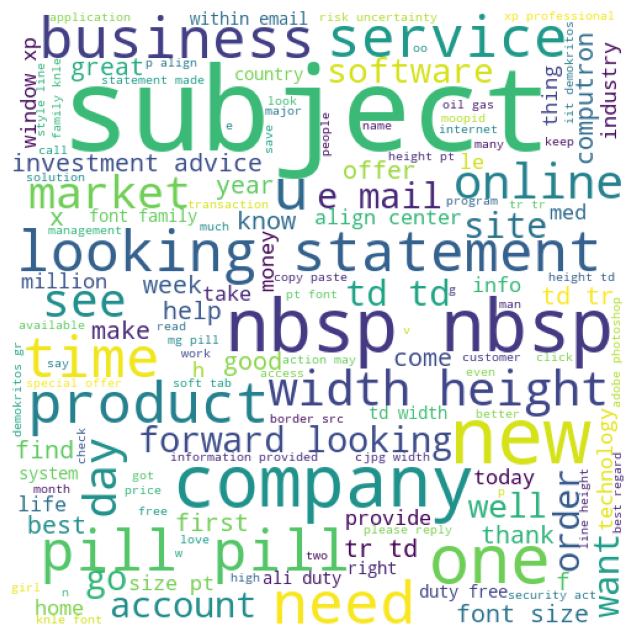

In [39]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [40]:
ham_wc = wc.generate(df[df['label_num'] == 0]['transformed_text'].str.cat(sep=" "))

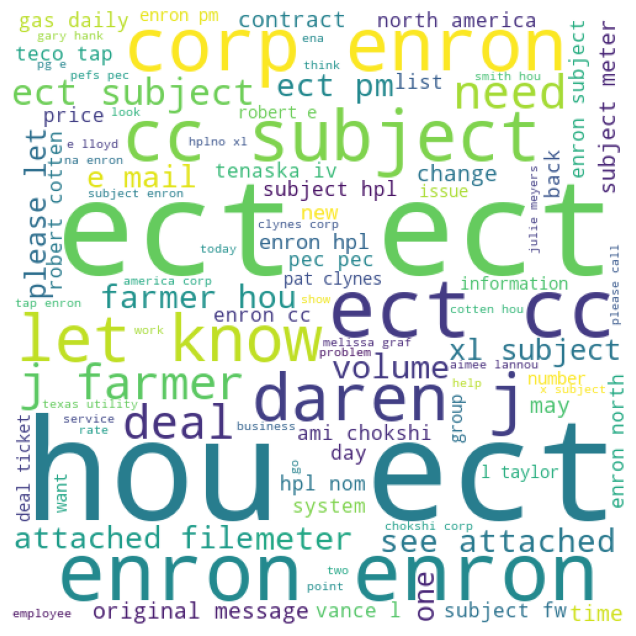

In [41]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

Purpose: Create an empty list called spam_corpus which will be used to store all the words from spam messages.
Reason: This list will accumulate words from all spam messages for further analysis

Combined Explanation:
Goal: Collect all words from spam messages into a single list.
Process:
Initialize an empty list to store the words.
Filter the DataFrame to include only spam messages and extract their text.
Loop through each spam message, splitting the message into words.
Append each word to the spam_corpus list.
Outcome: After running this code, spam_corpus will contain all the words from the spam messages, enabling further analysis such as frequency counting, word cloud generation, etc.

In [42]:
spam_corpus = []
for msg in df[df['label_num'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [43]:
len(spam_corpus)

197452

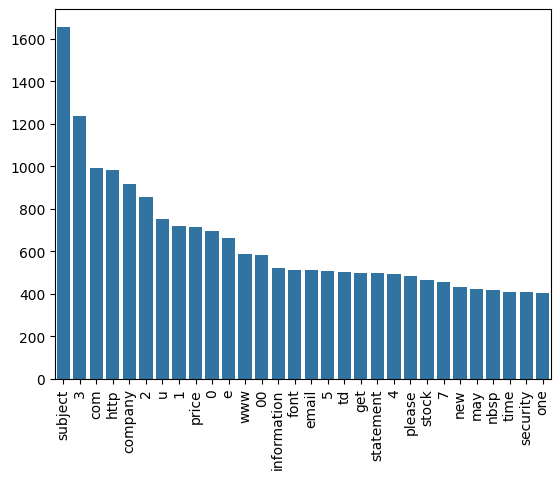

In [44]:
from collections import Counter
sns.barplot(x=[word for word, count in Counter(spam_corpus).most_common(30)], y=[count for word, count in Counter(spam_corpus).most_common(30)])
plt.xticks(rotation='vertical')
plt.show()



In [45]:
ham_corpus = []
for msg in df[df['label_num'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
len(ham_corpus)

388650

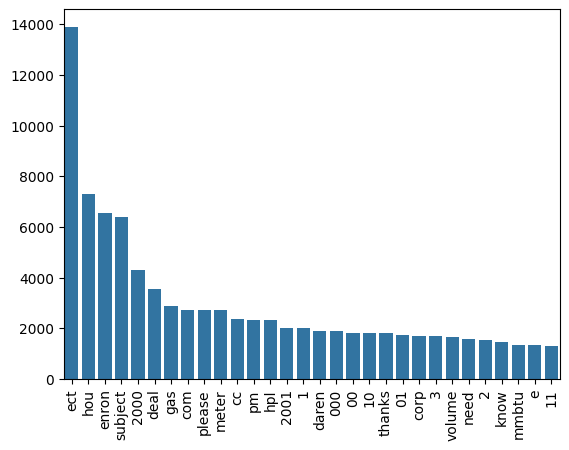

In [47]:
from collections import Counter
sns.barplot(x=[word for word, count in Counter(ham_corpus).most_common(30)], y=[count for word, count in Counter(ham_corpus).most_common(30)])
plt.xticks(rotation='vertical')
plt.show()



###FEATURE ENGINEERING

In [48]:
import re
import string
keywords = [
    'free', 'winner', 'urgent', 'money', 'click', 'buy', 'discount', 'offer',
    'guarantee', 'limited', 'act now', 'exclusive', 'cash', 'prize', 'deal',
    'promotion', 'instant', 'win', 'bonus', 'trial', 'access', 'claim', 
    'investment', 'risk-free', 'savings', 'cancel at any time', 'hidden charges',
    'free gift', 'no cost', 'free quote', 'free membership', 'free access',
    'online biz opportunity', 'earn money', 'work from home', 'multi-level marketing',
    'make money', 'financial freedom', 'get paid', 'easy money', 'extra cash',
    'wealth', 'affiliate', 'best price', 'lowest price', 'free trial', 'free offer',
    'free info', 'free sample', '100% free', 'no fees', 'no hidden costs',
    'satisfaction guaranteed', 'free consultation', 'no purchase necessary',
    'limited time', 'special promotion', 'unsecured credit', 'credit repair',
    'debt relief', 'payday loan', 'cash bonus', 'insurance', 'mortgage',
    'consolidate debt', 'get paid', 'increase sales', 'online business',
    'search engine listings', 'social security number', 'eliminate bad credit',
    'get rich quick', 'unbelievable', 'unbelievable deal', 'free money', 
    'free rewards', 'free trial', 'lifetime', 'no strings attached', 
    'free download', 'free trial offer', 'free registration', 'free subscription',
    'free access', 'free membership', 'free gift card', 'free cash', 'free website',
    'free service', 'free trial subscription', 'free newsletter', 'free report',
    'free software', 'free app', 'free tips', 'free training', 'free resources',
    'free eBook', 'free guide', 'free course']
def extract_features(text):
    # Basic features
    email_length = len(text)
    word_count = len(text.split())
    sentence_count = text.count('.') + text.count('!') + text.count('?')
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    average_word_length = np.mean([len(word) for word in text.split()]) if word_count > 0 else 0
    capital_letter_count = sum(1 for char in text if char.isupper())
    capital_letter_ratio = capital_letter_count / email_length if email_length > 0 else 0
    special_character_count = len(re.findall(r'[^a-zA-Z0-9\s]', text))

    # Keyword presence
    keyword_presence = [1 if keyword in text.lower() else 0 for keyword in keywords]

    return [email_length, word_count, sentence_count, punctuation_count, 
            average_word_length, capital_letter_ratio, special_character_count] + keyword_presence

# Apply the feature extraction to the dataset
features = df['transformed_text'].apply(extract_features)
features_df = pd.DataFrame(features.tolist(), columns=['email_length', 'word_count', 'sentence_count',
                                                       'punctuation_count', 'average_word_length',
                                                       'capital_letter_ratio', 'special_character_count'] + keywords)

# Combine original features with the new features
X = pd.concat([features_df, df['num_characters']], axis=1)
df.head(5)


,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3,subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3,subject photoshop window office cheap main tre...
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3,subject indian spring deal book teco pvr reven...


In [49]:
#TEXT VECTORIZATION
#USING BAG OF WORDS
df.head()

,text,label_num,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,322,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,95,24,3,subject hpl nom january 9 2001 see attached fi...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,2515,551,24,subject neon retreat ho ho ho around wonderful...
3,"Subject: photoshop , windows , office . cheap ...",1,404,49,3,subject photoshop window office cheap main tre...
4,Subject: re : indian springs\nthis deal is to ...,0,332,71,3,subject indian spring deal book teco pvr reven...


MODEL BUILDING
A vectorizer in the context of natural language processing (NLP) is a tool that converts text data into numerical format that can be used by machine learning algorithms. 
fit: Learns the vocabulary dictionary of all tokens in the provided text.
transform: Transforms the text data into a numerical matrix based on the learned vocabulary.
the result is a sparse matrix representation of the text data.
toarray(): Converts the sparse matrix to a dense NumPy array.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3200)

In [51]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
X.shape

(5171, 3200)

In [53]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [54]:
# appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [55]:
X.shape

(5171, 3201)

In [56]:
X

array([[1.21443691e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.22000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.50000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.51500000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.90000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.64000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.10400000e+03]])

In [57]:
y = df['label_num'].values

In [58]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
from imblearn.over_sampling import SMOTE

# Handling data imbalances
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [60]:
from sklearn.model_selection import train_test_split

X_train: The training set of features.
X_test: The testing set of features.
y_train: The training set of labels.
y_test: The testing set of labels.

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Accuracy: Indicates the proportion of correctly classified instances. It’s calculated as:

Accuracy
=
Number of Correct Predictions
Total Number of Predictions
Accuracy= 
Total Number of Predictions
Number of Correct Predictions
​
 
Confusion Matrix: Shows the count of true positives, true negatives, false positives, and false negatives, structured as:

[
True Negatives
False Positives
False Negatives
True Positives
]
[ 
True Negatives
False Negatives
​
  
False Positives
True Positives
​
 ]
Precision: Measures the accuracy of the positive predictions and is calculated as:

Precision
=
True Positives
True Positives
+
False Positives
Precision= 
True Positives+False Positives
True Positives
​


tfidf --> MNB

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier


Each of these classifiers is a machine learning algorithm with its own method for making predictions. Here’s a simple explanation of what each classifier does:

### 1. SVC (Support Vector Classifier)
- **`SVC(kernel='sigmoid', gamma=1.0)`**
- **What It Does**: SVC tries to find the best boundary (hyperplane) that separates different classes of data. The `sigmoid` kernel maps the data into a higher-dimensional space to make it easier to find a separation.
- **Use Case**: Useful for both linear and non-linear classification problems. Often used in text classification and image recognition.

### 2. KNeighborsClassifier
- **`knc = KNeighborsClassifier()`**
- **What It Does**: This classifier looks at the `k` nearest neighbors of a data point and assigns it to the class most common among them.
- **Use Case**: Simple and intuitive method often used for classification and regression tasks, especially when the data is not too large.

### 3. MultinomialNB (Multinomial Naive Bayes)
- **`mnb = MultinomialNB()`**
- **What It Does**: This classifier uses Bayes' theorem and works particularly well with discrete features (e.g., word counts in text classification).
- **Use Case**: Commonly used for text classification problems like spam detection or sentiment analysis.

### 4. DecisionTreeClassifier
- **`dtc = DecisionTreeClassifier()`**
- **What It Does**: It creates a tree-like model of decisions based on the features of the data. Each node represents a decision based on a feature, and each branch represents the outcome of that decision.
- **Use Case**: Useful for both classification and regression tasks, easy to understand and visualize.

### 5. LogisticRegression
- **`lrc = LogisticRegression(solver='liblinear', penalty='l1')`**
- **What It Does**: This classifier models the probability of the default class (usually the binary outcome) using a logistic function. The `l1` penalty adds a regularization term to avoid overfitting.
- **Use Case**: Widely used for binary classification problems such as predicting whether an email is spam or not.

### 6. RandomForestClassifier
- **`rfc = RandomForestClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: This classifier creates a forest of decision trees and merges them to get a more accurate and stable prediction.
- **Use Case**: Effective on a wide range of classification and regression tasks, robust to overfitting.

### 7. AdaBoostClassifier
- **`abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')`**
- **What It Does**: It combines multiple weak classifiers to create a strong classifier by focusing on the errors of the previous classifiers.
- **Use Case**: Good for improving the accuracy of weak models, often used in combination with other classifiers.

### 8. BaggingClassifier
- **`bc = BaggingClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: This classifier builds multiple instances of a specified classifier on random subsets of the data and then averages the results.
- **Use Case**: Useful for reducing variance and improving the stability of the model.

### 9. ExtraTreesClassifier
- **`etc = ExtraTreesClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: Similar to RandomForest, but it uses the whole dataset and random splits to build each tree, which usually leads to more randomness and less overfitting.
- **Use Case**: Effective for classification and regression tasks, offers more randomness compared to RandomForest.

### 10. GradientBoostingClassifier
- **`gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: Builds an ensemble of weak prediction models (usually decision trees) in a stage-wise manner and optimizes the loss function.
- **Use Case**: Often used for classification and regression problems, known for its high predictive performance.

### 11. XGBClassifier (Extreme Gradient Boosting)
- **`xgb = XGBClassifier(n_estimators=50, random_state=2)`**
- **What It Does**: An implementation of gradient boosting designed for speed and performance. It uses an efficient and scalable implementation of gradient boosting algorithms.
- **Use Case**: Widely used in machine learning competitions and practical applications for its high accuracy and speed.

These classifiers offer a variety of approaches for tackling classification problems, each with its own strengths and typical use cases. Depending on the problem at hand, some classifiers may perform better than others, and ensemble methods like the Voting Classifier can leverage the strengths of multiple classifiers.

In [65]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2,algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)


In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT':gbdt,
    #'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='macro',zero_division=0)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.7169082125603865, 0.35845410628019325)

In [69]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    try:
        current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"For {name}")
        print(f"Accuracy - {current_accuracy}")
        print(f"Precision - {current_precision}")
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)
    except Exception as e:
        print(f"Error training {name}: {e}")


For SVC
Accuracy - 0.7169082125603865
Precision - 0.35845410628019325
For KN
Accuracy - 0.7159420289855073
Precision - 0.6313925212773877
For NB
Accuracy - 0.9429951690821256
Precision - 0.9242269187986651
For DT
Accuracy - 0.9584541062801932
Precision - 0.9484149935277755
For LR
Accuracy - 0.9623188405797102
Precision - 0.94480408410305
For RF
Accuracy - 0.9816425120772947
Precision - 0.9742517006802721
For AdaBoost
Accuracy - 0.9323671497584541
Precision - 0.9085556753748217
For BgC
Accuracy - 0.9690821256038648
Precision - 0.9578328734512795
For ETC
Accuracy - 0.9874396135265701
Precision - 0.9812925170068028
For GBDT
Accuracy - 0.9623188405797102
Precision - 0.9486000161381425


In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.987440,0.981293
5,RF,0.981643,0.974252
7,BgC,0.969082,0.957833
9,GBDT,0.962319,0.948600
3,DT,0.958454,0.948415
4,LR,0.962319,0.944804
2,NB,0.942995,0.924227
6,AdaBoost,0.932367,0.908556
1,KN,0.715942,0.631393
0,SVC,0.716908,0.358454


In [72]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [73]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.987440
1,RF,Accuracy,0.981643
2,BgC,Accuracy,0.969082
3,GBDT,Accuracy,0.962319
4,DT,Accuracy,0.958454
5,LR,Accuracy,0.962319
6,NB,Accuracy,0.942995
7,AdaBoost,Accuracy,0.932367
8,KN,Accuracy,0.715942
9,SVC,Accuracy,0.716908


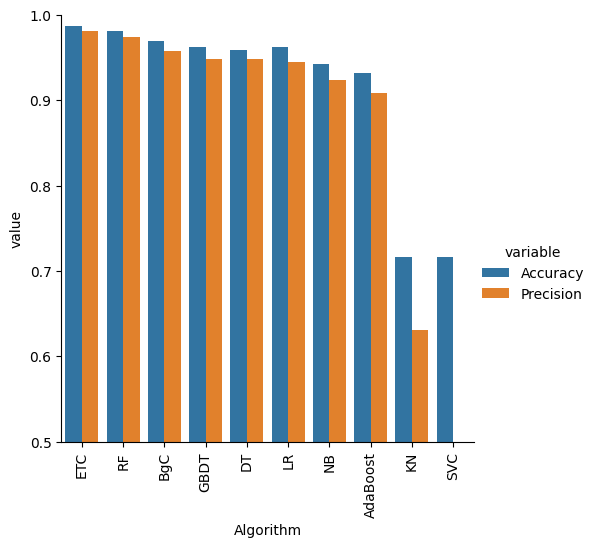

In [74]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data = performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

 #model improve
 
 #1. Change the max_features parameter of Tfidf

In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [76]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [77]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,ETC,0.987440,0.981293,0.987440,0.981293
1,RF,0.981643,0.974252,0.981643,0.974252
2,BgC,0.969082,0.957833,0.969082,0.957833
3,GBDT,0.962319,0.948600,0.962319,0.948600
4,DT,0.958454,0.948415,0.958454,0.948415
5,LR,0.962319,0.944804,0.962319,0.944804
6,NB,0.942995,0.924227,0.942995,0.924227
7,AdaBoost,0.932367,0.908556,0.932367,0.908556
8,KN,0.715942,0.631393,0.715942,0.631393
9,SVC,0.716908,0.358454,0.716908,0.358454


In [78]:
new_df_scaled = new_df.merge(pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}))

In [79]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,ETC,0.987440,0.981293,0.987440,0.981293,0.987440,0.981293
1,RF,0.981643,0.974252,0.981643,0.974252,0.981643,0.974252
2,BgC,0.969082,0.957833,0.969082,0.957833,0.969082,0.957833
3,GBDT,0.962319,0.948600,0.962319,0.948600,0.962319,0.948600
4,DT,0.958454,0.948415,0.958454,0.948415,0.958454,0.948415
5,LR,0.962319,0.944804,0.962319,0.944804,0.962319,0.944804
6,NB,0.942995,0.924227,0.942995,0.924227,0.942995,0.924227
7,AdaBoost,0.932367,0.908556,0.932367,0.908556,0.932367,0.908556
8,KN,0.715942,0.631393,0.715942,0.631393,0.715942,0.631393
9,SVC,0.716908,0.358454,0.716908,0.358454,0.716908,0.358454


In [80]:
new_df_scaled1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [81]:
new_df_scaled = new_df_scaled.merge(new_df_scaled1,on='Algorithm')

In [82]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,ETC,0.987440,0.981293,0.987440,0.981293,0.987440,0.981293,0.987440,0.981293
1,RF,0.981643,0.974252,0.981643,0.974252,0.981643,0.974252,0.981643,0.974252
2,BgC,0.969082,0.957833,0.969082,0.957833,0.969082,0.957833,0.969082,0.957833
3,GBDT,0.962319,0.948600,0.962319,0.948600,0.962319,0.948600,0.962319,0.948600
4,DT,0.958454,0.948415,0.958454,0.948415,0.958454,0.948415,0.958454,0.948415
5,LR,0.962319,0.944804,0.962319,0.944804,0.962319,0.944804,0.962319,0.944804
6,NB,0.942995,0.924227,0.942995,0.924227,0.942995,0.924227,0.942995,0.924227
7,AdaBoost,0.932367,0.908556,0.932367,0.908556,0.932367,0.908556,0.932367,0.908556
8,KN,0.715942,0.631393,0.715942,0.631393,0.715942,0.631393,0.715942,0.631393
9,SVC,0.716908,0.358454,0.716908,0.358454,0.716908,0.358454,0.716908,0.358454


In [83]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you have a list of models and their names
models = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT':gbdt,
}

# True labels
y_true = y_test  # Replace with your actual test labels

# Initialize a list to store results
results = []

# Iterate over each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Replace with your model's predictions
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True, zero_division=0)
    
    # Extract relevant metrics
    results.append({
        'Model': model_name,
        'Precision Class 0': report['Class 0']['precision'],
        'Recall Class 0': report['Class 0']['recall'],
        'F1-Score Class 0': report['Class 0']['f1-score'],
        'Precision Class 1': report['Class 1']['precision'],
        'Recall Class 1': report['Class 1']['recall'],
        'F1-Score Class 1': report['Class 1']['f1-score'],
        'Overall Accuracy': report['accuracy']
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


      Model  Precision Class 0  Recall Class 0  F1-Score Class 0  \
0       SVC           0.716908        1.000000          0.835115   
1        KN           0.765403        0.870620          0.814628   
2        NB           0.971034        0.948787          0.959782   
3        DT           0.971660        0.970350          0.971005   
4        LR           0.990237        0.956873          0.973269   
5        RF           0.991837        0.982480          0.987136   
6  AdaBoost           0.971910        0.932615          0.951857   
7       BgC           0.984973        0.971698          0.978290   
8       ETC           0.995918        0.986523          0.991198   
9      GBDT           0.982167        0.964960          0.973487   

   Precision Class 1  Recall Class 1  F1-Score Class 1  Overall Accuracy  
0           0.000000        0.000000          0.000000          0.716908  
1           0.497382        0.324232          0.392562          0.715942  
2           0.877419      

modules used so far; panda ,scikit
A Voting Classifier is a type of machine learning model that combines the predictions of multiple different models to make a final prediction. Think of it like a group of experts who each give their opinion on a decision, and the final decision is made based on what most experts agree on. Here's a simple breakdown:
How It Works
Multiple Models:

Imagine you have three different models (experts) that are each good at making predictions in different ways.
For example, one model might be good at recognizing certain patterns, another at handling numbers, and a third at understanding relationships.
Making Predictions:

Each model looks at the same data and makes its own prediction.
For instance, if the task is to predict whether an email is spam or not, each model will say "spam" or "not spam."
Combining Predictions:

The Voting Classifier takes the predictions from all the models and combines them.
There are two main ways to combine the predictions:
Hard Voting: This is like majority voting. The final prediction is the one that the most models agree on. If two out of three models say "spam," then the final prediction is "spam."
Soft Voting: This considers how confident each model is in its prediction. The final prediction is based on the average of these confidence scores. This is often more accurate because it takes into account not just the vote, but how sure each model is about its vote.
Why Use a Voting Classifier?
Improved Accuracy: By combining the strengths of different models, a Voting Classifier often makes more accurate predictions than any single model on its own.
Reduced Risk of Errors: If one model makes a mistake, the other models can correct it. This reduces the chance of the final prediction being wrong.
Robustness: It balances out the weaknesses of individual models, leading to a more reliable overall prediction.


In [84]:
#Voting Classifier
#svc = SVC(kernel='sigmoid' , gamma=1.0,probability=True)
#xgb = XGBClassifier(n_estimators=50,random_state=2)
#mnb = MultinomialNB()
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [85]:
voting = VotingClassifier(estimators=[('rf',rfc), ('gbdt',gbdt),('et',etc)],voting='soft')

In [86]:
voting.fit(X_train,y_train) 

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845410628019323
Precision 0.9540983606557377


A Stacking Classifier is another type of ensemble method in machine learning that combines multiple models to improve predictive performance. Think of it like consulting multiple experts (base models) and then having a super expert (meta-model) who makes the final decision based on the input from these experts. Here’s a simple explanation of how it works:

How Stacking Classifier Works
Base Models (Level-0 models):
These are the initial models that make predictions on the data.
For example, you might have a Decision Tree, a Random Forest, and a Support Vector Machine as your base models.
Meta-Model (Level-1 model):
This is the model that takes the predictions from the base models as input and makes the final prediction.
Common choices for the meta-model are simple models like Logistic Regression or more complex ones like Gradient Boosting.

In [88]:
#Applying Stacking
estimators=[('rf', rfc), ('gbdt',gbdt), ('et',etc), ('bgc', bc)]
final_estimator = LogisticRegression()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835748792270531
Precision 0.956953642384106


In [92]:
# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Generate confidence levels
confidence_levels = clf.predict_proba(X_test)

# Extract confidence levels for Class 1
confidence_class_1 = confidence_levels[:, 1]

# Display confidence levels
for i, conf in enumerate(confidence_class_1):
    print(f"Sample {i}: Predicted Class: {y_pred[i]}, Confidence Level for Class 1: {conf:.2f}")

              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99       742
     Class 1       0.96      0.99      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

Sample 0: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 1: Predicted Class: 1, Confidence Level for Class 1: 0.98
Sample 2: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 3: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 4: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 5: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 6: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 7: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 8: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 9: Predicted Class: 0, Confidence Level for Class 1: 0.00
Sample 10: Predicted Cl

In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))